**This is my first kernel submission on kaggle. I got the motivation from other EDA notebooks for this competition.**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv("../input/train.csv")
test_data = pd.read_csv("../input/test.csv")

In [3]:
print("Train data dimensions: ", train_data.shape)
print("Test data dimensions: ", test_data.shape)

In [4]:
train_data.head()

id 
 cat1 
 cat2 
 cat3 
 cat4 
 cat5 
 cat6 
 cat7 
 cat8 
 cat9 
 ... 
 cont6 
 cont7 
 cont8 
 cont9 
 cont10 
 cont11 
 cont12 
 cont13 
 cont14 
 loss 
 
 
 
 
 0 
 1 
 A 
 B 
 A 
 B 
 A 
 A 
 A 
 A 
 B 
 ... 
 0.718367 
 0.335060 
 0.30260 
 0.67135 
 0.83510 
 0.569745 
 0.594646 
 0.822493 
 0.714843 
 2213.18 
 
 
 1 
 2 
 A 
 B 
 A 
 A 
 A 
 A 
 A 
 A 
 B 
 ... 
 0.438917 
 0.436585 
 0.60087 
 0.35127 
 0.43919 
 0.338312 
 0.366307 
 0.611431 
 0.304496 
 1283.60 
 
 
 2 
 5 
 A 
 B 
 A 
 A 
 B 
 A 
 A 
 A 
 B 
 ... 
 0.289648 
 0.315545 
 0.27320 
 0.26076 
 0.32446 
 0.381398 
 0.373424 
 0.195709 
 0.774425 
 3005.09 
 
 
 3 
 10 
 B 
 B 
 A 
 B 
 A 
 A 
 A 
 A 
 B 
 ... 
 0.440945 
 0.391128 
 0.31796 
 0.32128 
 0.44467 
 0.327915 
 0.321570 
 0.605077 
 0.602642 
 939.85 
 
 
 4 
 11 
 A 
 B 
 A 
 B 
 A 
 A 
 A 
 A 
 B 
 ... 
 0.178193 
 0.247408 
 0.24564 
 0.22089 
 0.21230 
 0.204687 
 0.202213 
 0.246011 
 0.432606 
 2763.85 
 
 
 
 5 rows × 132 columns

In [5]:
print("Number of missing values",train_data.isnull().sum().sum())

Number of missing values 0


This is a good news as there are not missing values :)

**Lets analyze the distribution of continuous features:**

In [6]:
train_data.describe()

id 
 cont1 
 cont2 
 cont3 
 cont4 
 cont5 
 cont6 
 cont7 
 cont8 
 cont9 
 cont10 
 cont11 
 cont12 
 cont13 
 cont14 
 loss 
 
 
 
 
 count 
 188318.000000 
 188318.000000 
 188318.000000 
 188318.000000 
 188318.000000 
 188318.000000 
 188318.000000 
 188318.000000 
 188318.000000 
 188318.000000 
 188318.000000 
 188318.000000 
 188318.000000 
 188318.000000 
 188318.000000 
 188318.000000 
 
 
 mean 
 294135.982561 
 0.493861 
 0.507188 
 0.498918 
 0.491812 
 0.487428 
 0.490945 
 0.484970 
 0.486437 
 0.485506 
 0.498066 
 0.493511 
 0.493150 
 0.493138 
 0.495717 
 3037.337686 
 
 
 std 
 169336.084867 
 0.187640 
 0.207202 
 0.202105 
 0.211292 
 0.209027 
 0.205273 
 0.178450 
 0.199370 
 0.181660 
 0.185877 
 0.209737 
 0.209427 
 0.212777 
 0.222488 
 2904.086186 
 
 
 min 
 1.000000 
 0.000016 
 0.001149 
 0.002634 
 0.176921 
 0.281143 
 0.012683 
 0.069503 
 0.236880 
 0.000080 
 0.000000 
 0.035321 
 0.036232 
 0.000228 
 0.179722 
 0.670000 
 
 
 25% 
 147748.250000 
 0.346090 
 0.358319 
 0.336963 
 0.327354 
 0.281143 
 0.336105 
 0.350175 
 0.312800 
 0.358970 
 0.364580 
 0.310961 
 0.311661 
 0.315758 
 0.294610 
 1204.460000 
 
 
 50% 
 294539.500000 
 0.475784 
 0.555782 
 0.527991 
 0.452887 
 0.422268 
 0.440945 
 0.438285 
 0.441060 
 0.441450 
 0.461190 
 0.457203 
 0.462286 
 0.363547 
 0.407403 
 2115.570000 
 
 
 75% 
 440680.500000 
 0.623912 
 0.681761 
 0.634224 
 0.652072 
 0.643315 
 0.655021 
 0.591045 
 0.623580 
 0.566820 
 0.614590 
 0.678924 
 0.675759 
 0.689974 
 0.724623 
 3864.045000 
 
 
 max 
 587633.000000 
 0.984975 
 0.862654 
 0.944251 
 0.954297 
 0.983674 
 0.997162 
 1.000000 
 0.980200 
 0.995400 
 0.994980 
 0.998742 
 0.998484 
 0.988494 
 0.844848 
 121012.250000

In [7]:
contFeatureslist = []
for colName,x in train_data.iloc[1,:].iteritems():
    #print(x)
    if(not str(x).isalpha()):
        contFeatureslist.append(colName)

In [8]:
print(contFeatureslist)

['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'loss']


In [9]:
contFeatureslist.remove("id")
contFeatureslist.remove("loss")

### Box plots for continuous features

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

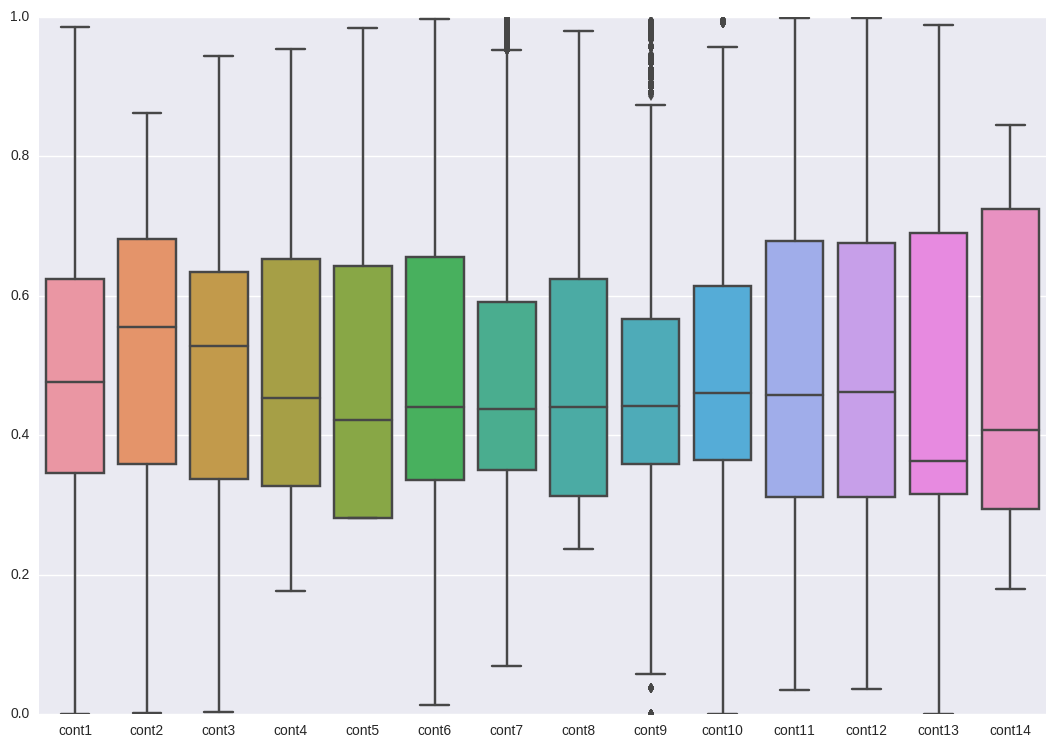

In [11]:
plt.figure(figsize=(13,9))
sns.boxplot(train_data[contFeatureslist])

As we  can see, some of the features like cont13, cont14 etc. are highly skewed. we might need to normalize these features before running any algorithms

### Correlation between continuous features

In [12]:
# Include  target variable also to find correlation between features and target feature as well
contFeatureslist.append("loss")

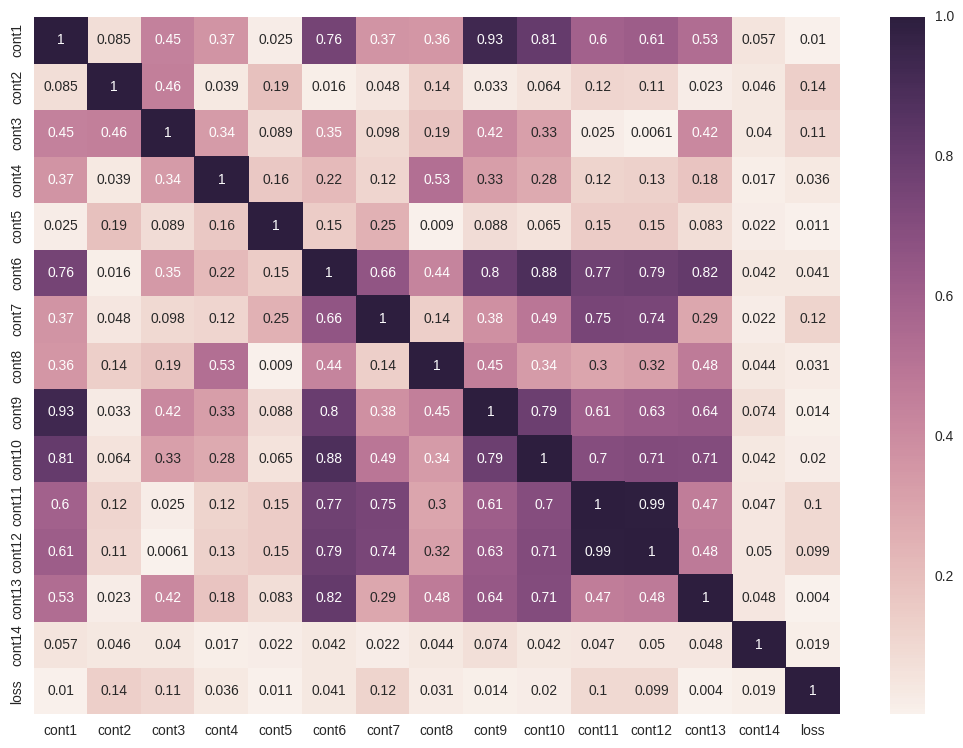

In [13]:
correlationMatrix = train_data[contFeatureslist].corr().abs()

plt.subplots(figsize=(13, 9))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()

### Analysis of loss feature

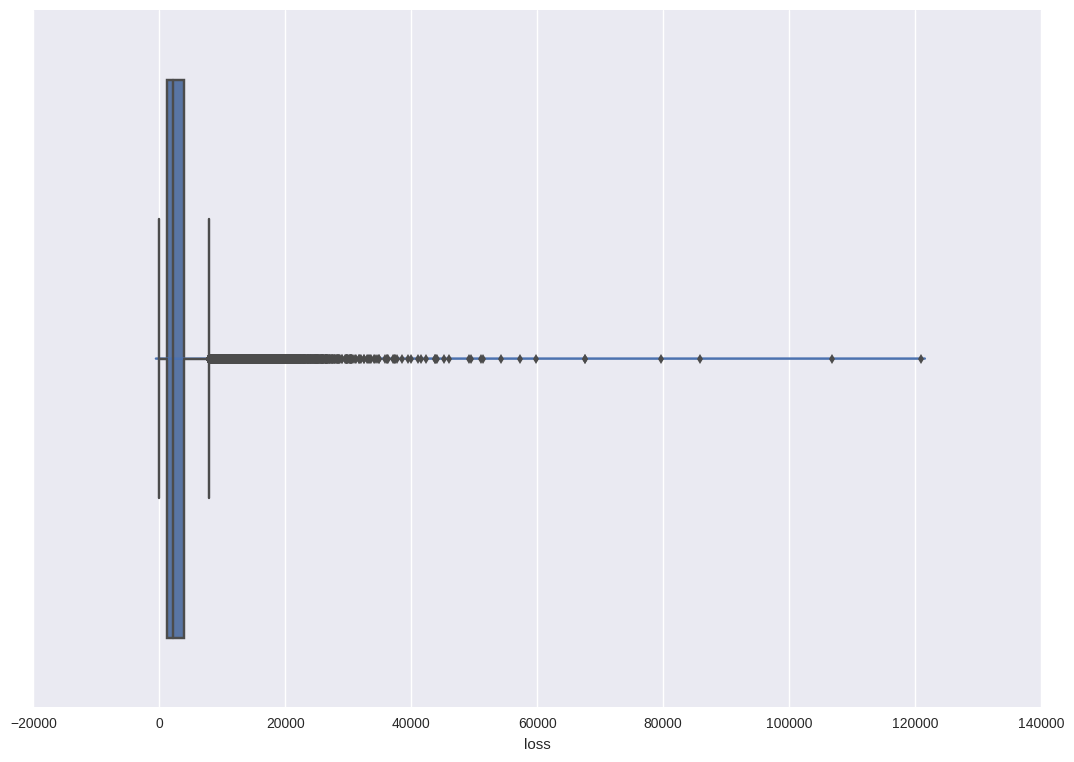

In [14]:
plt.figure(figsize=(13,9))
sns.distplot(train_data["loss"])
sns.boxplot(train_data["loss"])

Here, we can see loss is highly right skewed data. This happened because there are many outliers in the data that we ca see from box plot. Lets apply log to see if we can get normal distribution

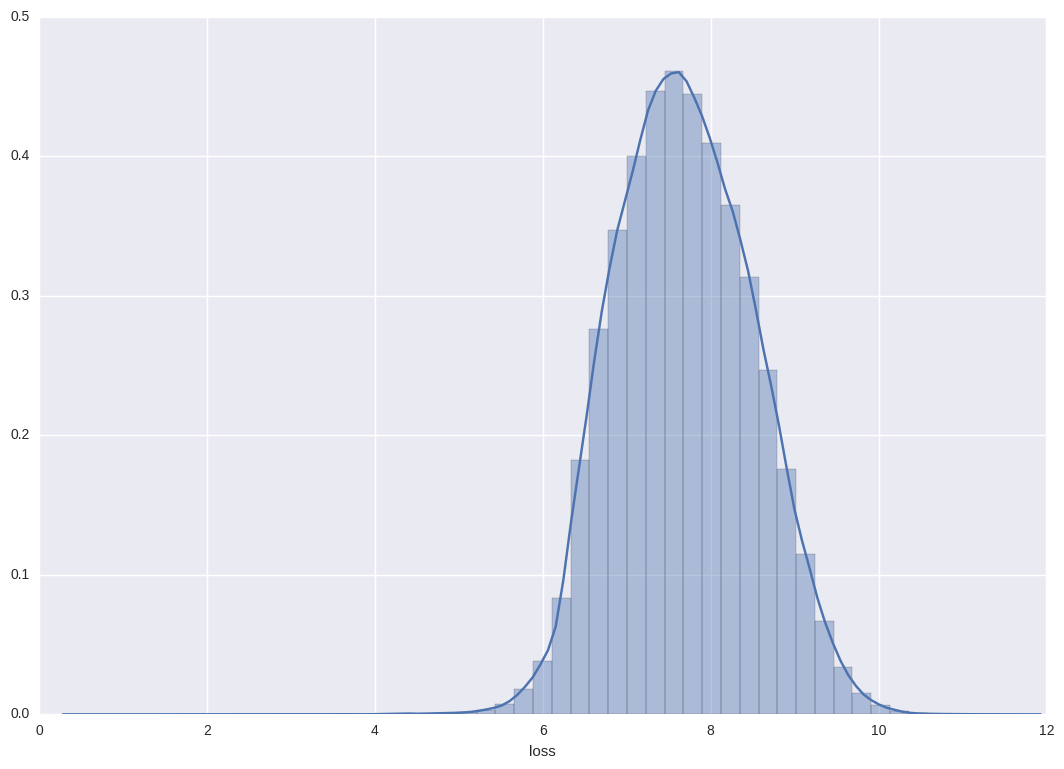

In [15]:
plt.figure(figsize=(13,9))
sns.distplot(np.log1p(train_data["loss"]))

So we got normal distribution by applying logarithm on loss function

Bang. Finally we got normal distribution, so we can train model using target feature as log of loss. This way we don't have to remove outliers.

In [16]:
catCount = sum(str(x).isalpha() for x in train_data.iloc[1,:])
print("Number of categories: ",catCount)

Number of categories:  116


There are 116 categories with non alphanumeric values, most of the machine learning algorithms doesn't work with alpha numeric values. So, lets convert it into numeric values

In [17]:
catFeatureslist = []
for colName,x in train_data.iloc[1,:].iteritems():
    if(str(x).isalpha()):
        catFeatureslist.append(colName)

**Unique categorical values per each category**

In [18]:
print(train_data[catFeatureslist].apply(pd.Series.nunique))

cat1        2
cat2        2
cat3        2
cat4        2
cat5        2
cat6        2
cat7        2
cat8        2
cat9        2
cat10       2
cat11       2
cat12       2
cat13       2
cat14       2
cat15       2
cat16       2
cat17       2
cat18       2
cat19       2
cat20       2
cat21       2
cat22       2
cat23       2
cat24       2
cat25       2
cat26       2
cat27       2
cat28       2
cat29       2
cat30       2
         ... 
cat87       4
cat88       4
cat89       8
cat90       7
cat91       8
cat92       7
cat93       5
cat94       7
cat95       5
cat96       8
cat97       7
cat98       5
cat99      16
cat100     15
cat101     19
cat102      9
cat103     13
cat104     17
cat105     20
cat106     17
cat107     20
cat108     11
cat109     84
cat110    131
cat111     16
cat112     51
cat113     61
cat114     19
cat115     23
cat116    326
dtype: int64


### Convert categorical string values to numeric values

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
for cf1 in catFeatureslist:
    le = LabelEncoder()
    le.fit(train_data[cf1].unique())
    train_data[cf1] = le.transform(train_data[cf1])

In [21]:
train_data.head(5)

id 
 cat1 
 cat2 
 cat3 
 cat4 
 cat5 
 cat6 
 cat7 
 cat8 
 cat9 
 ... 
 cont6 
 cont7 
 cont8 
 cont9 
 cont10 
 cont11 
 cont12 
 cont13 
 cont14 
 loss 
 
 
 
 
 0 
 1 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 ... 
 0.718367 
 0.335060 
 0.30260 
 0.67135 
 0.83510 
 0.569745 
 0.594646 
 0.822493 
 0.714843 
 2213.18 
 
 
 1 
 2 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 ... 
 0.438917 
 0.436585 
 0.60087 
 0.35127 
 0.43919 
 0.338312 
 0.366307 
 0.611431 
 0.304496 
 1283.60 
 
 
 2 
 5 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 ... 
 0.289648 
 0.315545 
 0.27320 
 0.26076 
 0.32446 
 0.381398 
 0.373424 
 0.195709 
 0.774425 
 3005.09 
 
 
 3 
 10 
 1 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 ... 
 0.440945 
 0.391128 
 0.31796 
 0.32128 
 0.44467 
 0.327915 
 0.321570 
 0.605077 
 0.602642 
 939.85 
 
 
 4 
 11 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 ... 
 0.178193 
 0.247408 
 0.24564 
 0.22089 
 0.21230 
 0.204687 
 0.202213 
 0.246011 
 0.432606 
 2763.85 
 
 
 
 5 rows × 132 columns

In [22]:
sum(train_data[catFeatureslist].apply(pd.Series.nunique) > 2)

44

### Analysis of categorical features with levels between 5-10

In [23]:
filterG5_10 = list((train_data[catFeatureslist].apply(pd.Series.nunique) > 5) & 
                (train_data[catFeatureslist].apply(pd.Series.nunique) < 10))

In [24]:
catFeaturesG5_10List = [i for (i, v) in zip(catFeatureslist, filterG5_10) if v]

In [25]:
len(catFeaturesG5_10List)

8

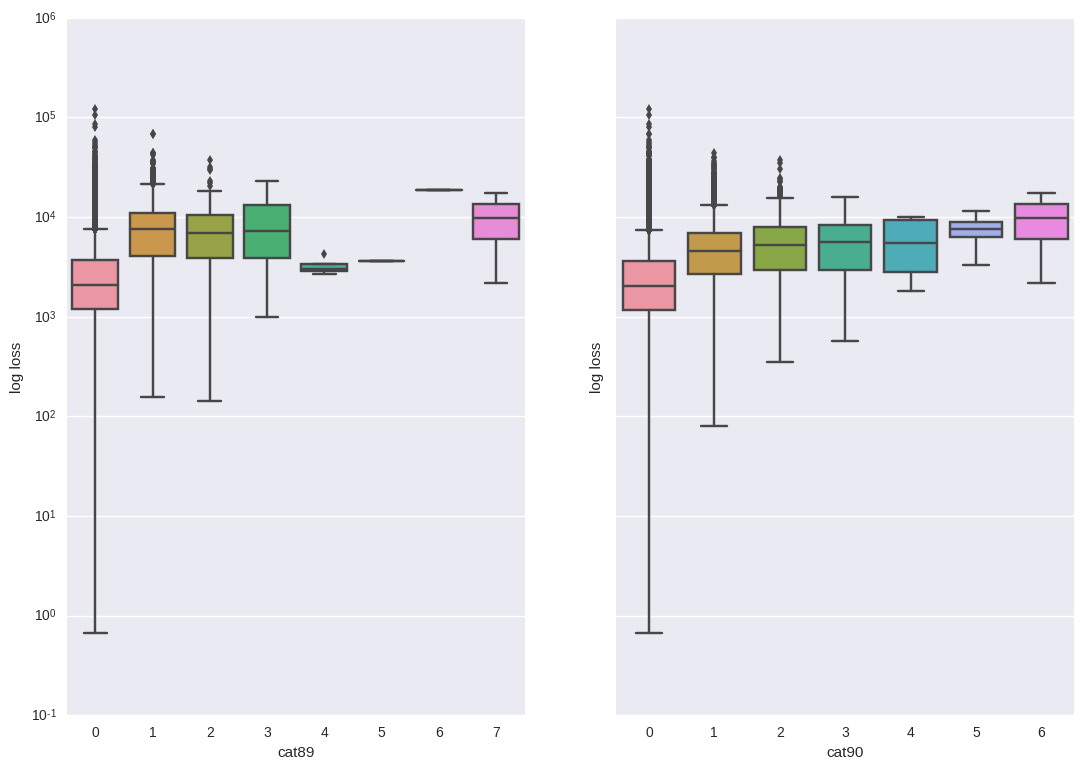

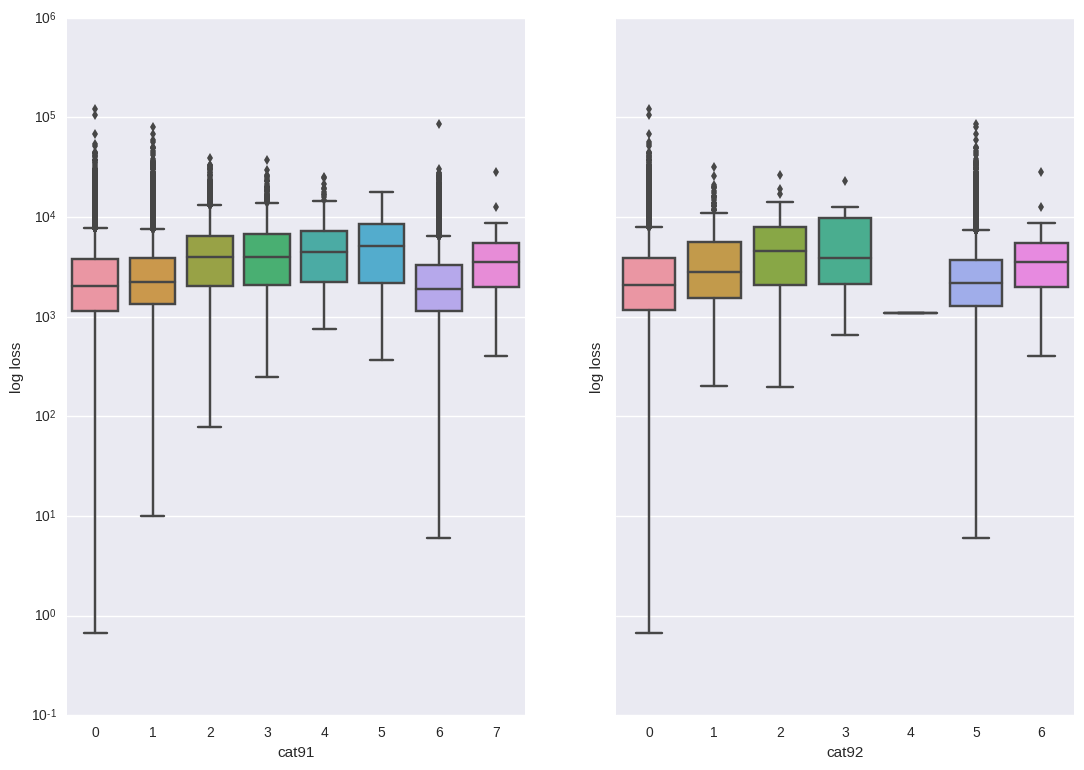

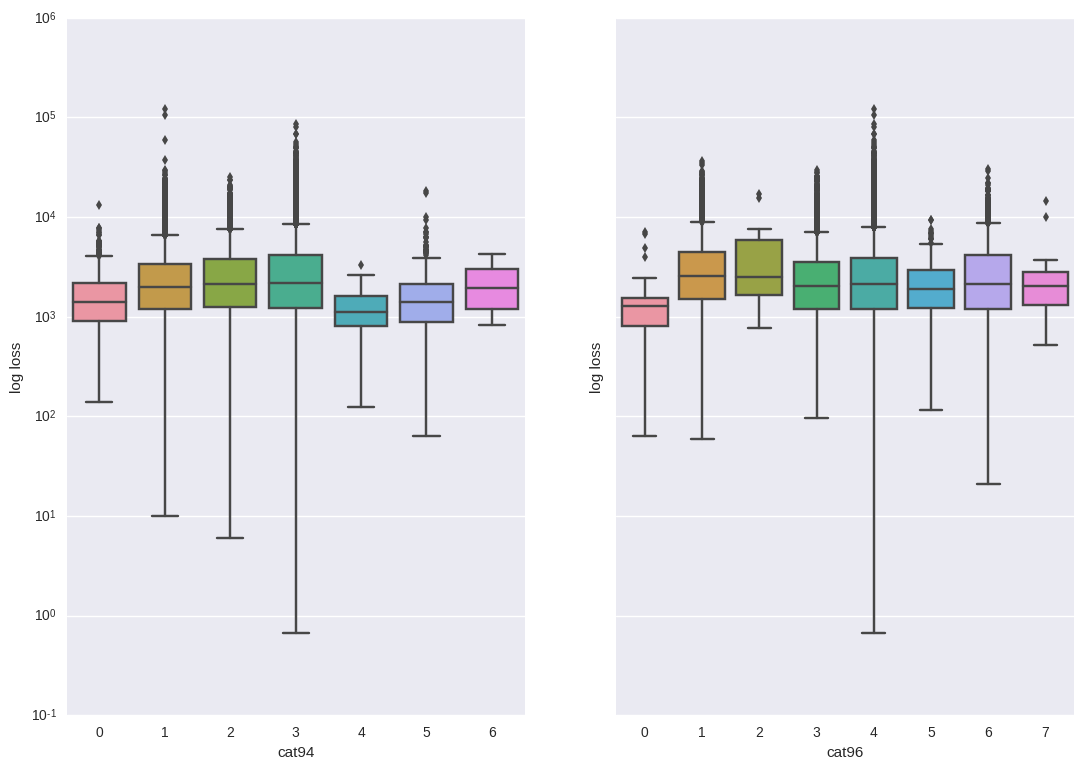

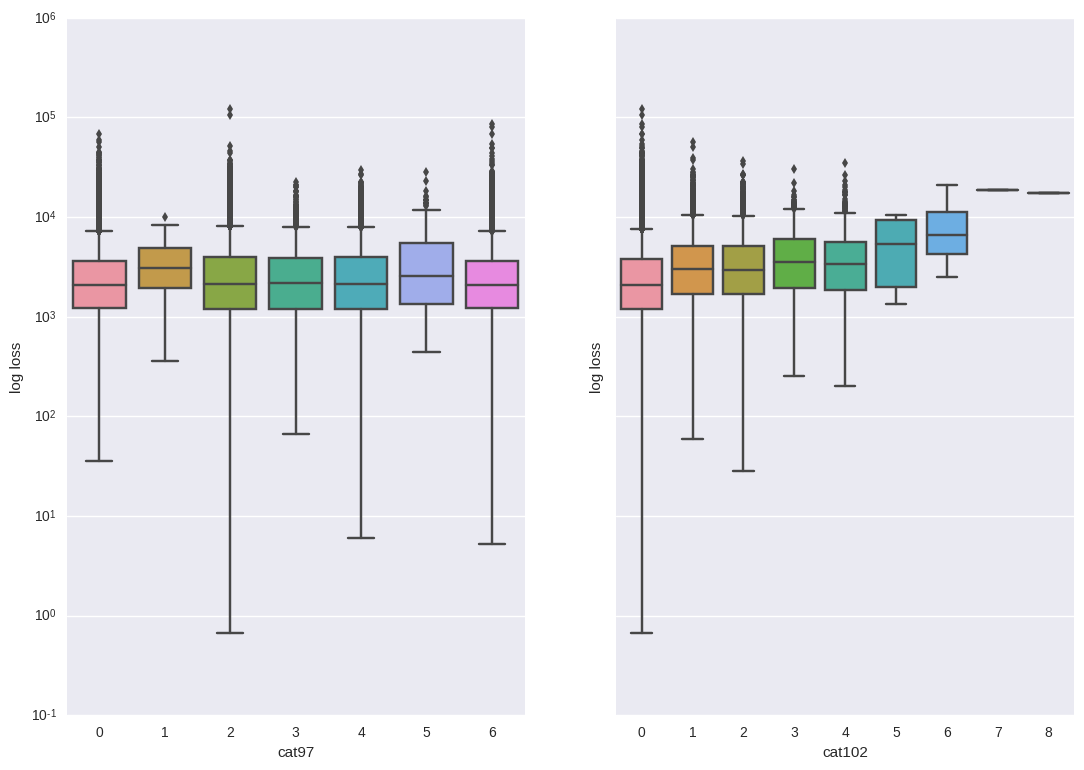

In [26]:
ncol = 2
nrow = 4
try:
    for rowIndex in range(nrow):
        f,axList = plt.subplots(nrows=1,ncols=ncol,sharey=True,figsize=(13, 9))
        features = catFeaturesG5_10List[rowIndex*ncol:ncol*(rowIndex+1)]
        
        for axIndex in range(len(axList)):
            sns.boxplot(x=features[axIndex], y="loss", data=train_data, ax=axList[axIndex])
                        
            # With original scale it is hard to visualize because of outliers
            axList[axIndex].set(yscale="log")
            axList[axIndex].set(xlabel=features[axIndex], ylabel='log loss')
except IndexError:
    print("")

### Correlation between categorical variables

In [27]:
filterG2 = list((train_data[catFeatureslist].apply(pd.Series.nunique) == 2))
catFeaturesG2List = [i for (i, v) in zip(catFeatureslist, filterG2) if v]
catFeaturesG2List.append("loss")

In [28]:
corrCatMatrix = train_data[catFeaturesG2List].corr().abs()

s = corrCatMatrix.unstack()
sortedSeries= s.order(kind="quicksort",ascending=False)

print("Top 5 most correlated categorical feature pairs: \n")
print(sortedSeries[sortedSeries != 1.0][0:9])

Top 5 most correlated categorical feature pairs: 

cat2   cat9     0.932420
cat9   cat2     0.932420
cat50  cat6     0.925731
cat6   cat50    0.925731
cat8   cat66    0.862231
cat66  cat8     0.862231
cat57  cat7     0.809418
cat7   cat57    0.809418
cat3   cat16    0.783480
dtype: float64


Note: We should do chi-square test on categorical features to find independence. I have done pearson correlation which is measure to find association between features

*Thank you. I hope this will be useful for you. Please share your comments/feedback*

More EDA analysis for this competition: (Thanks for the motivation)  
https://www.kaggle.com/nminus1/allstate-claims-severity/allstate-eda-python  
https://www.kaggle.com/dmi3kno/allstate-claims-severity/allstate-eda  